**Tourism Trend Analyzer**

In [ ]:
import pandas as pd
# Upload data
data = pd.read_csv('/content/tourism_resource_dataset.csv')

# Show the first few rows
data.head()


,timestamp,location_id,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,season,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,resource_allocation,t_sne_dim1,t_sne_dim2
0,2024-12-01 00:00:00,LOC_003,808,0.907638,19.368864,127,51.506727,summer,0,5.502615,1,0.857819,high,-4.576337,0.582736
1,2024-12-01 01:00:00,LOC_001,948,0.974266,17.404945,37,55.901717,autumn,0,4.736401,0,0.961133,high,-28.314085,20.022820
2,2024-12-01 02:00:00,LOC_003,292,0.321912,16.366819,113,68.533024,winter,1,2.522827,0,0.306956,low,1.329948,5.881103
3,2024-12-01 03:00:00,LOC_003,592,0.811889,20.266316,52,85.301039,autumn,1,2.687745,1,0.701945,medium,-11.921675,20.376535
4,2024-12-01 04:00:00,LOC_001,89,0.936667,15.922471,145,52.258779,summer,1,1.094965,1,0.512834,medium,-6.068825,-4.793058


In [ ]:
# Check dataset info and missing values
data.info()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             1000 non-null   object 
 1   location_id           1000 non-null   object 
 2   visitor_count         1000 non-null   int64  
 3   resource_usage_rate   1000 non-null   float64
 4   temperature           1000 non-null   float64
 5   air_quality_index     1000 non-null   int64  
 6   noise_level           1000 non-null   float64
 7   season                1000 non-null   object 
 8   peak_hour_flag        1000 non-null   int64  
 9   visitor_satisfaction  1000 non-null   float64
 10  sensor_noise_flag     1000 non-null   int64  
 11  resource_prediction   1000 non-null   float64
 12  resource_allocation   1000 non-null   object 
 13  t_sne_dim1            1000 non-null   float64
 14  t_sne_dim2            1000 non-null   float64
dtypes: float64(7), int64(4

,0
timestamp,0
location_id,0
visitor_count,0
resource_usage_rate,0
temperature,0
air_quality_index,0
noise_level,0
season,0
peak_hour_flag,0
visitor_satisfaction,0


In [ ]:
# Fill missing values with the mean of the column
# data.fillna(data.mean(), inplace=True)

# Or, if you prefer to drop rows with missing values:
data.dropna(inplace=True)


In [ ]:
# Get summary statistics for numerical columns
data.describe()


,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,t_sne_dim1,t_sne_dim2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,516.800000,0.647452,25.181186,86.485000,64.028052,0.511000,5.555733,0.467000,0.582126,-0.477890,-0.422334
std,281.178718,0.199183,5.758527,37.615166,19.916098,0.500129,2.554291,0.499159,0.174560,17.179542,15.797633
min,50.000000,0.300132,15.008856,20.000000,30.013057,0.000000,1.014411,0.000000,0.184301,-34.308690,-38.914820
25%,274.000000,0.469661,20.231001,53.000000,46.979884,0.000000,3.468966,0.000000,0.462370,-13.762012,-12.932375
50%,510.000000,0.652413,25.449839,87.000000,63.456537,1.000000,5.599099,0.000000,0.576830,-0.444045,0.167176
75%,762.250000,0.818292,30.240147,120.000000,81.232047,1.000000,7.725748,1.000000,0.701947,12.986121,12.436126
max,999.000000,0.997955,34.994276,149.000000,99.826269,1.000000,9.997764,1.000000,0.976715,36.515007,33.652870


In [ ]:
# Exclude non-numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                      visitor_count  resource_usage_rate  temperature  \
visitor_count              1.000000             0.028124    -0.010431   
resource_usage_rate        0.028124             1.000000     0.012193   
temperature               -0.010431             0.012193     1.000000   
air_quality_index          0.018647             0.002776    -0.001043   
noise_level               -0.004453             0.006853     0.019253   
peak_hour_flag             0.008864             0.043326     0.039061   
visitor_satisfaction       0.036441            -0.054018    -0.007019   
sensor_noise_flag          0.021121             0.000953     0.031043   
resource_prediction        0.821436             0.593177    -0.001444   
t_sne_dim1                 0.027548             0.026190     0.007466   
t_sne_dim2                -0.008700             0.005657     0.026820   

                      air_quality_index  noise_level  peak_hour_flag  \
visitor_count                  0.018647    -0.00445

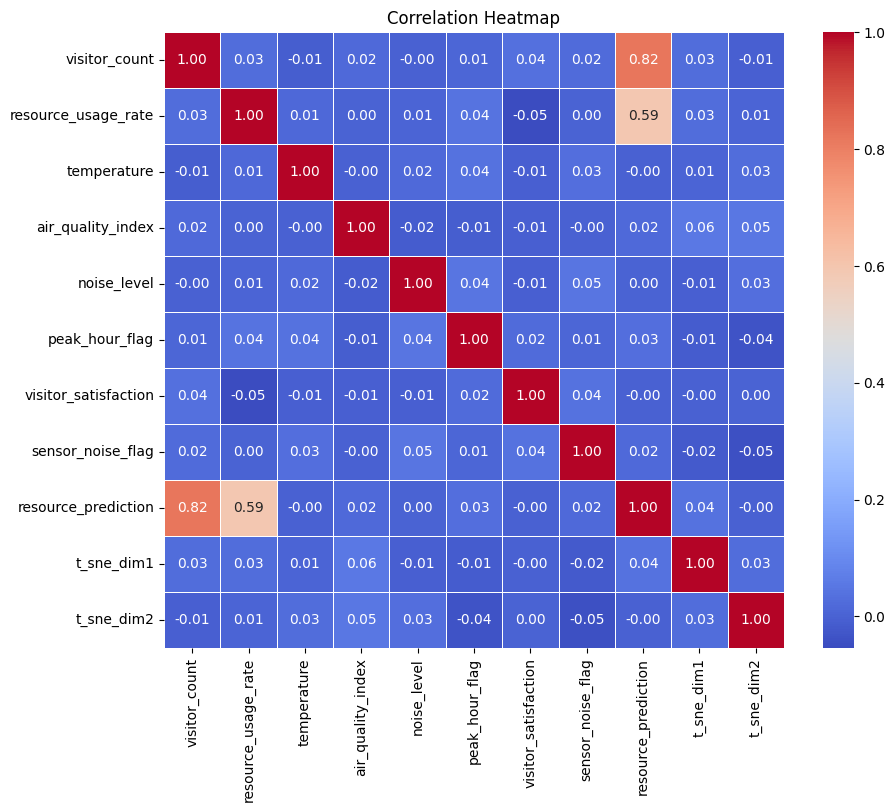

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


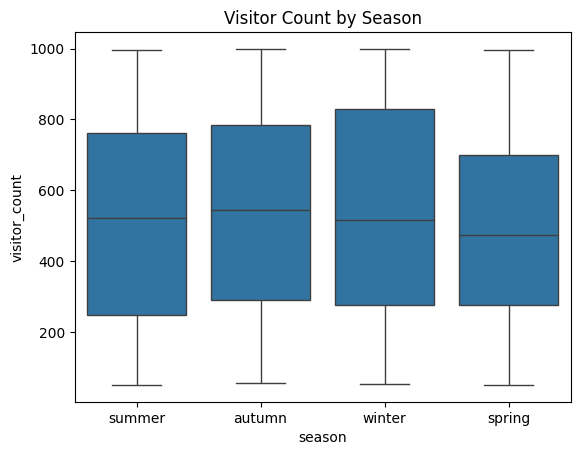

In [ ]:
sns.boxplot(x='season', y='visitor_count', data=data)
plt.title('Visitor Count by Season')
plt.show()


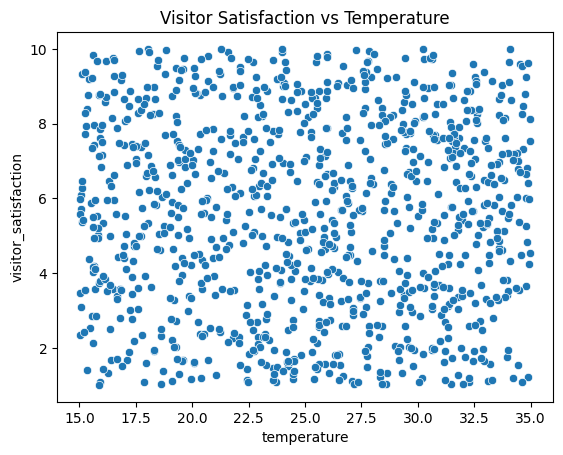

In [ ]:
# Scatter plot for visitor satisfaction vs temperature
sns.scatterplot(x='temperature', y='visitor_satisfaction', data=data)
plt.title('Visitor Satisfaction vs Temperature')
plt.show()


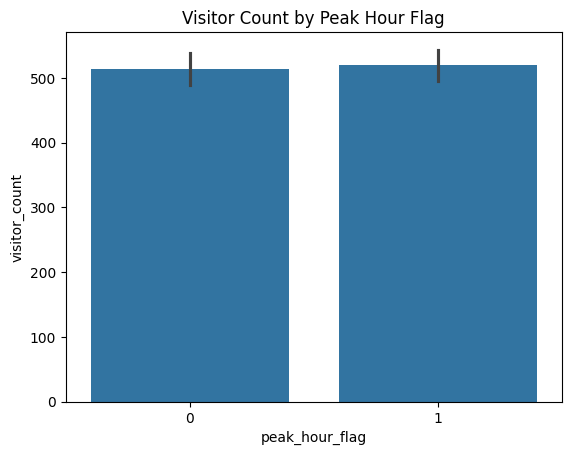

In [ ]:
# Bar plot for visitor count by peak hour flag
sns.barplot(x='peak_hour_flag', y='visitor_count', data=data)
plt.title('Visitor Count by Peak Hour Flag')
plt.show()


**Observations**

Q1.Which season has the highest number of visitors?

---


Ans.:- Summer and Autumn attract more visitors, making them top travel seasons based on this dataset.While Spring sees the lowest number of visitors.

Q2.Is there any noticeable pattern between temperature and satisfaction?

---


Ans.:-There is no noticeable pattern or relationship between temperature and visitor satisfaction, as the data points are randomly scattered.






Q3.Do more visitors visit during peak hours?

---

Ans.:-No, more visitors do not visit during peak hours, as the visitor count is nearly the same for peak and non-peak hours.